In [2]:
pip install hvplot

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas

In [4]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']])

In [7]:
# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(df_market_data_scaled, 
                                columns=['price_change_percentage_24h', 'price_change_percentage_7d',
                                       'price_change_percentage_14d', 'price_change_percentage_30d',
                                       'price_change_percentage_60d', 'price_change_percentage_200d',
                                       'price_change_percentage_1y'])

# Copy the crypto names from the original data
df_market_scaled['Crypto_names'] = market_data_df.index

# Set the coinid column as index
df_market_scaled = df_market_scaled.set_index('Crypto_names')


# Display sample data
df_market_scaled.head(5)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
Crypto_names,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k=list(range(1,11))

# Create an empty list to store the inertia values
inertia=[]


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_scaled)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_original": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_original = pd.DataFrame(elbow_data)


# Display the DataFrame
df_elbow_original

,k_original,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: title={'center': 'Elbow Curve'}, xlabel='k_original'>

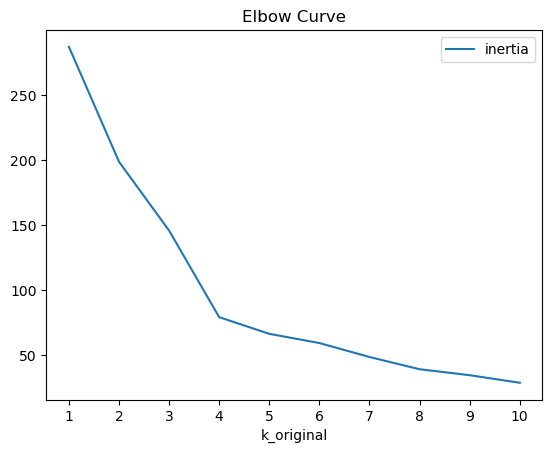

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow_original.plot.line(
    x="k_original", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

elbow_plot

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [10]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [11]:
# Fit the K-Means model using the scaled data
model.fit(df_market_scaled)


KMeans(n_clusters=4, random_state=0)

In [12]:
# Predict the clusters to group the cryptocurrencies using the scaled data
kmeans_predictions = model.predict(df_market_scaled)

# View the resulting array of cluster values.
kmeans_predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [13]:
# Create a copy of the DataFrame
df_market_scaled_prediction=df_market_scaled.copy()

In [14]:
# Add a new column to the DataFrame with the predicted clusters
df_market_scaled_prediction['Prediction']=kmeans_predictions

# Display sample data
df_market_scaled_prediction.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Prediction
Crypto_names,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


/opt/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

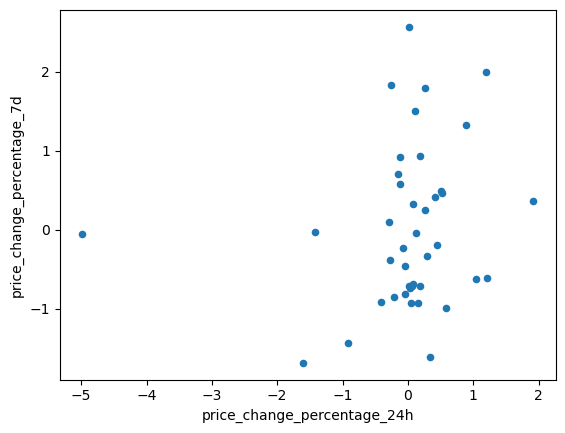

In [15]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_scaled_plot=df_market_scaled_prediction.plot.scatter(
                    x="price_change_percentage_24h",
                    y="price_change_percentage_7d",
                    cmap='viridis'
                )

market_scaled_plot

### Optimize Clusters with Principal Component Analysis.

In [16]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [17]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_pca = pca.fit_transform(df_market_scaled)

# View the first five rows of the DataFrame. 
market_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [18]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89%

In [19]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_pca_df = pd.DataFrame(
    market_pca,
    columns=["PCA1", "PCA2" , "PCA3"]
)

# Copy the crypto names from the original data
market_pca_df["Crypto_names"]=market_data_df.index

# Set the coinid column as index
market_pca_df=market_pca_df.set_index('Crypto_names')


# Display sample data
market_pca_df.head(5)

,PCA1,PCA2,PCA3
Crypto_names,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [20]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_pca=list(range(1,11))

# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for i in k_pca:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(market_pca_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_pca': k_pca , 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow_pca.head()

,k_pca,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


<Axes: title={'center': 'Elbow Curve'}, xlabel='k_pca'>

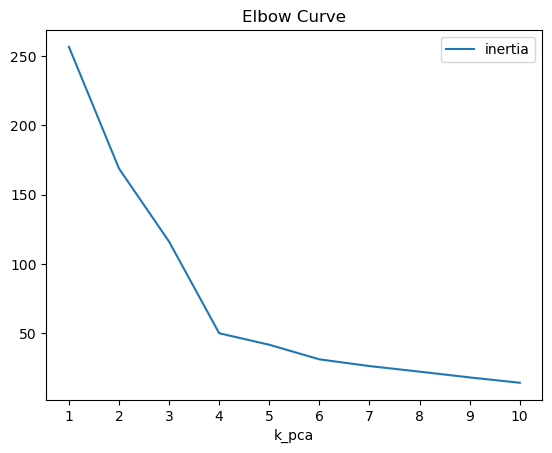

In [21]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_plot = df_elbow_pca.plot.line(
    x="k_pca", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
elbow_pca_plot

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, its the sames as the earlier "K" value in the notebook.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [22]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=2, random_state=0)

In [23]:
# Fit the K-Means model using the PCA data
model.fit(market_pca_df)

KMeans(n_clusters=2, random_state=0)

In [24]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_predict = model.predict(market_pca_df)

# Print the resulting array of cluster values.
print(k_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0]


In [25]:
# Create a copy of the DataFrame with the PCA data
market_pca_prediction_df = market_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_pca_prediction_df['pca_prediction']= k_predict

# Display sample data
market_pca_prediction_df.head()

,PCA1,PCA2,PCA3,pca_prediction
Crypto_names,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [29]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
market_pca_plot = market_pca_prediction_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="pca_prediction",
    hover_cols=['Crypto_names'])

market_pca_plot

:NdOverlay   [pca_prediction]
   :Scatter   [PCA1]   (PCA2,Crypto_names)

### Determine the Weights of Each Feature on each Principal Component

In [27]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=df_market_scaled.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
"price_change_percentage_200d" and "price_change_percentage_1y" have the strongest positive influence on PCA1, "price_change_percentage_24h" has the strongest negative influence on PCA1.

"price_change_percentage_30d" and "price_change_percentage_14d" have the strongest positive influence on PCA2, "price_change_percentage_1y" has the strong negative influence on PCA2.

"price_change_percentage_7d" has the strongest positive influence on PCA3, "price_change_percentage_60d" has the strongest negative influence on PCA3.
    